# Byte-level BPE, an universal tokenizer but...

> Study about the "universality" of a Byte-level Byte-Pair-Encoding tokenizer (BBPE)

## About the Byte-level BPE (BBPE) tokenizer

From the [tutorial "Tokenizer summary"](https://huggingface.co/transformers/master/tokenizer_summary.html), read the paragraphs [Byte-Pair Encoding](https://huggingface.co/transformers/master/tokenizer_summary.html#byte-pair-encoding) and [Byte-level BPE](https://huggingface.co/transformers/master/tokenizer_summary.html#byte-level-bpe) to get the best overview of a Byte-level BPE (Byte-level Byte-Pair-Encoding) and read the Abstract and Conclusion paragraphs of the original paper: [Neural Machine Translation with Byte-Level Subwords](https://arxiv.org/pdf/1909.03341.pdf]) (Facebook AI, 12/05/2019).

> **[Abstract]** Almost all existing machine translation models are built on top of character-based vocabularies: characters, subwords or words. Rare characters from noisy text or character-rich languages such as Japanese and Chinese however can unnecessarily take up vocabulary slots and limit its compactness. Representing text at the level of bytes and using the 256 byte set as vocabulary is a potential solution to this issue. High computational cost has however prevented it from being widely deployed or used in practice. **In this paper, we investigate byte-level subwords, specifically byte-level BPE (BBPE), which is compacter than character vocabulary and has no out-of-vocabulary tokens, but is more efficient than using pure bytes only is.** We claim that contextualizing BBPE embeddings is necessary, which can be implemented by a convolutional or recurrent layer. **Our experiments show that BBPE has comparable performance to BPE while its size is only 1/8 of that for BPE.** In the multilingual setting, BBPE maximizes vocabulary sharing across many languages and achieves better translation quality. Moreover, we show that BBPE enables transferring models between languages with non-overlapping character sets.

> **[Conclusion]** We proposed BBPE which builds a byte-level subword vocabulary for machine translation. It results in a much more compact vocabulary than character-based ones do without the loss of performance. In multilingual settings, the former often outperforms the latter. **BBPE does not have any out-of-vocabulary tokens, allowing us to transfer a model using BBPE between languages with non-overlapping vocabularies.** This transfer learning paradigm is actually very generic and can be applied to any languages and datasets for performance gain or training acceleration. With the same vocabulary size, BBPE segments sentences into shorter sequences than character-based methods do, leading to faster training and inference. Our future work includes: eliminating source-target sentence length imbalance; evaluating BBPE in one-to-many and many-to-many translation settings; exploring better segmentation algorithms for byte-level subwords.

## About the tokenizers and NLP libraries used in this study

The tokenizers and NLP libraries used to perform this study were:
- English pre-trained GPT2 tokenizer ([GPT2TokenizerFast](https://huggingface.co/transformers/model_doc/gpt2.html#gpt2tokenizerfast)) from the [Transformers](https://github.com/huggingface/transformers) library (Hugging Face, version 3.0.0): it is a Fast GPT-2 BBPE tokenizer (backed by Hugging Face's tokenizers library)

- Deep Learning library [fastai ](https://github.com/fastai/fastai2) (need to be careful as some librarier are changing rapidly so need some ajustment and use old version like in th elink](https://github.com/piegu/fastai-projects/blob/master/nlputils_fastai2.py)

**Note about the Deep Learning libraries**: the [Tokenizers](https://github.com/huggingface/tokenizers) and [Transformers](https://huggingface.co/transformers/) libraries from [Hugging Face](https://huggingface.co/) are today the most up-to-date NLP libraries (Natural Language Processing) used all over the world when fastai is a great tool for training Deep Learning models, especially with powerful fastai tools like Learning rate finder, Mixed precision training, Distributed training, Gradual unfreezing, Differential learning rates and 1cycle policy.

Pre-trained BBPE tokenizer for this study was choosen by purpose. The key point is to use BBPE tokenizers trained on huge corpus because they can then tokenize any word of any language without using the unknown token.

# 1. Installing required libraries and mounting google drive

In [ ]:
#start by mounting google drive
from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# need to instal fastai 2 etc before 
!pip install -q git+https://github.com/fastai/fastai
!pip install -q git+https://github.com/fastai/fastcore
!pip install -q iterative-stratification

## Initialization

In [ ]:
cd /content/gdrive/MyDrive/fastai

/content/gdrive/MyDrive/fastai


In [ ]:
# from fastai2.text.all import *
# from nlputils_fastai2 import * 

from fastai.text.all import *
from nlputilsfastai import * 

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
gpu = 0
torch.cuda.set_device(gpu)
print(f'cuda device: {torch.cuda.current_device()}')
print(f'cuda device name: {torch.cuda.get_device_name(gpu)}')

cuda device: 0
cuda device name: Tesla T4


In [ ]:
!nvidia-smi

Tue Mar 16 17:40:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load standard snipet to prevent random disconnects
This cell runs JS code to automatic reconnect to runtime.

In [ ]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [ ]:
# Get config of fastai2 paths
config = Config()
config.d

{'archive_path': '/root/.fastai/archive',
 'data_path': '/root/.fastai/data',
 'model_path': '/root/.fastai/models',
 'storage_path': '/tmp',
 'version': 2}

This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents (for other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias)).

In [ ]:
# setup new path_data and create the corresponding folder
lang = 'pl'
name = f'{lang}wiki'
data_path = config['data_path']
path_data = data_path/name
path_data.mkdir(exist_ok=True, parents=True)

# 2. Loading previously prepared scraped wiki file ~1G for particular language
for that purpose another notebook was used [wiki download](https://github.com/len-sla/other/blob/main/wiki_download.ipynb)

In [ ]:
!du -hs {'/content/gdrive/MyDrive/fastai/all_texts_plwiki.csv'}

1.1G	/content/gdrive/MyDrive/fastai/all_texts_plwiki.csv


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/fastai/all_texts_plwiki.csv')
df.head()

,text
0,"Vanquish – gra konsolowa z gatunku third-person shooter, wyprodukowana przez PlatinumGames i wydana przez SEGA. Jej światowa premiera miała miejsce 19 października 2010 roku na konsolach PlayStation 3 i Xbox 360. 10 maja 2017 roku zapowiedziano wersję na komputery osobiste, której premiera odbędzie się 25 maja 2017 roku.\n\nAkcja gry rozgrywa się w okresie, w którym na Ziemi zaczyna brakować surowców i dwa największe mocarstwa (Stany Zjednoczone i Rosja) rozpoczynają o nie rywalizację. Pierwsi atakują Rosjanie dowodzeni przez Zajcewa. Przywódca agresorów stawia ultimatum: kapitulacja w cią..."
1,"Książka obrazkowa – specyficzna forma książki skierowana najczęściej do najmłodszych dzieci. W tego typu książkach tekstu jest niewiele lub nie ma go wcale. W publikacjach tych warstwa wizualna odgrywa nadrzędną rolę, a warstwa tekstowa jest w nich jedynie dodatkiem. Tekst powinien komponować się z grafiką, a nie odwrotnie, oderwany od ilustracji nie posiada bowiem większego znaczenia. Bez obrazu nie jest zrozumiały. Książkę obrazkową określa się mianem ewenementu natury edytorskiej. \n\nW polskiej bibliografii brakuje literatury przedmiotu poświęconej książce obrazkowej. W wielu źródłach ..."
2,"Gilles Simon (ur. 27 grudnia 1984 w Nicei) – francuski tenisista, reprezentant w Pucharze Davisa, olimpijczyk.\n\nKarierę tenisową Francuz rozpoczął w roku 2002. Pierwsze zwycięstwo w turniejach rangi ""ITF Futures"" odniósł w czerwcu 2003 roku w Lizbonie, a zawodach kategorii ATP Challenger Tour w styczniu 2005 roku w Numei.\n\nW turniejach rangi ATP World Tour pierwszy znaczący wynik Simon osiągnął w połowie kwietnia roku 2006, awansując do finału rozgrywek w Walencji. Finałowy pojedynek przegrał jednak w dwóch setach z Nicolásem Almagro.\n\nNa początku sezonu 2007 Simon wygrał po raz pier..."
3,"Wsiewołod Emilewicz Meyerhold, Mejerchold ros. Всеволод Эмильевич Мейерхольд (ur. w Penzie, zm. 2 lutego 1940 w Moskwie) – rosyjski reżyser, aktor teatralny, twórca nowatorskiego współczesnego teatru sowieckiego.\n\nPrzyszedł na świat jako ósme z kolei dziecko właściciela fabryki wódek i kupca, Emila Meyerholda, Niemca z Dolnego Śląska, osiadłego w Rosji. Na chrzcie (w kościele ewangelickim obrządku luterańskiego) otrzymał imiona Karl Theodor Casimir. Do 1895 roku miał obywatelstwo niemieckie. W 1895 roku ukończył II gimnazjum w Penzie. Rok wcześniej nie został dopuszczony do egzaminu dojr..."
4,"Alexandre-Édouard Kierzkowski właśc. Aleksander Edward Kierzkowski herbu Krzywda (ur. 21 listopada 1816 w Raczycach, zm. 4 sierpnia 1870) – kanadyjski żołnierz, inżynier i polityk polskiego pochodzenia.\n\nUrodził się w Raczycach koło Odolanowa (Wielkie Księstwo Poznańskie) jako syn Filipa Jakuba (napoleończyka, oficera wojsk polskich) i Marianny Ludwiki Liebermann. Został ochrzczony 20 października 1817 roku w Odolanowie. Wstąpił do Wojska Polskiego w czasie powstania listopadowego. Po klęsce wyemigrował do Francji, gdzie uzyskał w Paryżu w 1838 roku dyplom inżyniera na École Centrale des..."


# 3. Byte-level BPE (BBPE) tokenizers from Transformers and Tokenizers (Hugging Face libraries)

We are following 3 steps in order to get 2 identical GPT2 tokenizers, one trained on an English corpus and the other on Wikipedia in Portuguese
1. **Get the pre-trained GPT2 Tokenizer (pre-training with an English corpus) from the Transformers library (Hugging Face)**: it will give us the tokenizer stucture we need and the pre-trained English tokenizer.
2. **Train a Byte-level BPE (BBPE) Tokenizer on the Portuguese wikipedia corpus by using the Tokenizers library (Hugging Face)**: this will give us the vocabulary files of our GPT2 tokenizer in Portuguese.
3. **Import the tokenizer config files in Portuguese into the pre-trained GPT2 Tokenizer**: it will give us a tokenizer structure with the vocab in Portuguese.

### 1. Get the pre-trained GPT2 Tokenizer (pre-training with an English corpus)

Firstly, will need to install the transformers library.

In [ ]:
! pip install transformers
!pip freeze | grep transformers

transformers==4.4.0


Then, we can get the English pre-trained GPT2 tokenizer ([GPT2Tokenizer](https://huggingface.co/transformers/model_doc/gpt2.html#gpt2tokenizer) or [GPT2TokenizerFast](https://huggingface.co/transformers/model_doc/gpt2.html#gpt2tokenizerfast)).

In [ ]:
%%time
from transformers import GPT2TokenizerFast

pretrained_weights = 'gpt2'
tokenizer_en = GPT2TokenizerFast.from_pretrained(pretrained_weights)

CPU times: user 164 ms, sys: 40.9 ms, total: 205 ms
Wall time: 532 ms


In [ ]:
# To correct the warning about token_pad (GPT2TokenizerFast), run the following code
# source: https://github.com/huggingface/transformers/issues/2648#issuecomment-616177044
tokenizer_en.pad_token = tokenizer_en.eos_token

Let's check the GPT2 tokenizer vocab. 

In [ ]:
# source: https://huggingface.co/transformers/_modules/transformers/tokenization_utils_fast.html

print('---------- vocab ----------')
print()

print('vocab_files_names:',tokenizer_en.vocab_files_names)
print()

for k,v in tokenizer_en.pretrained_vocab_files_map.items():
    print(k)
    for kk,vv in v.items():
        print('- ',kk,':',vv)
    print()
    
print('vocab_size:',tokenizer_en.vocab_size)
print()
#print(tokenizer_en.get_vocab())

num = 50
print(f'First {num} items of the vocab: {dict(itertools.islice(tokenizer_en.get_vocab().items(), 20))}')

---------- vocab ----------

vocab_files_names: {'vocab_file': 'vocab.json', 'merges_file': 'merges.txt', 'tokenizer_file': 'tokenizer.json'}

vocab_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/vocab.json
-  gpt2-medium : https://huggingface.co/gpt2-medium/resolve/main/vocab.json
-  gpt2-large : https://huggingface.co/gpt2-large/resolve/main/vocab.json
-  gpt2-xl : https://huggingface.co/gpt2-xl/resolve/main/vocab.json
-  distilgpt2 : https://huggingface.co/distilgpt2/resolve/main/vocab.json

merges_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/merges.txt
-  gpt2-medium : https://huggingface.co/gpt2-medium/resolve/main/merges.txt
-  gpt2-large : https://huggingface.co/gpt2-large/resolve/main/merges.txt
-  gpt2-xl : https://huggingface.co/gpt2-xl/resolve/main/merges.txt
-  distilgpt2 : https://huggingface.co/distilgpt2/resolve/main/merges.txt

tokenizer_file
-  gpt2 : https://huggingface.co/gpt2/resolve/main/tokenizer.json
-  gpt2-medium : https://huggingface.co/gpt

# 4. Train a Byte-level BPE (BBPE) tokenizer on the Polish Wikipedia

We'll use the [Tokenizers](https://github.com/huggingface/tokenizers) library from Hugging Face in order to train a **Byte-level BPE (BBPE) Tokenizer** on the Portuguese Wikipedia with the objective to get the vocab files `vocab.json`, which is a list of the most frequent tokens ranked by frequency, and the `merges.txt` which is a list of merges.

In [ ]:
!pip install tokenizers
!pip freeze | grep tokenizers

tokenizers==0.10.1


# copying previosly created wiki txt file





In [ ]:
!cp /content/gdrive/MyDrive/fastai/all_texts_plwiki.csv  /root/.fastai/data/plwiki
!cp /content/gdrive/MyDrive/fastai/all_texts_plwiki.txt  /root/.fastai/data/plwiki

In [ ]:
ls /root/.fastai/data/plwiki -all

total 2147980
drwxr-xr-x 3 root root       4096 Mar 16 18:26 ./
drwxr-xr-x 3 root root       4096 Mar 16 17:19 ../
-rw------- 1 root root 1101183658 Mar 16 17:41 all_texts_plwiki.csv
-rw------- 1 root root 1098323868 Mar 16 17:42 all_texts_plwiki.txt
drwxr-xr-x 2 root root       4096 Mar 16 18:26 ByteLevelBPE_tokenizer_pl/


#### Training

In [ ]:
path_data

Path('/root/.fastai/data/plwiki')

In [ ]:
# Get GPT2 tokenizer_en vocab size
ByteLevelBPE_tokenizer_pl_vocab_size = tokenizer_en.vocab_size
ByteLevelBPE_tokenizer_pl_vocab_size

50257

In [ ]:
%%time
# ByteLevelBPETokenizer Represents a Byte-level BPE as introduced by OpenAI with their GPT-2 model
from tokenizers import ByteLevelBPETokenizer

ByteLevelBPE_tokenizer_pl = ByteLevelBPETokenizer()

# Get list of paths to corpus files
paths = [str(path_data/'all_texts_plwiki.txt')]

# Customize training with <|endoftext|> special GPT2 token
ByteLevelBPE_tokenizer_pl.train(files=paths, 
                                vocab_size=ByteLevelBPE_tokenizer_pl_vocab_size, 
                                min_frequency=2, 
                                special_tokens=["<|endoftext|>"],
                                show_progress=True) 

# Get sequence length max of 1024
ByteLevelBPE_tokenizer_pl.enable_truncation(max_length=1024)

CPU times: user 58min 41s, sys: 10.3 s, total: 58min 51s
Wall time: 29min 57s


In [ ]:
# save tokenizer pl
ByteLevelBPE_tokenizer_pl_rep = 'ByteLevelBPE_tokenizer_pl'
path_to_ByteLevelBPE_tokenizer_pl_rep = path_data/ByteLevelBPE_tokenizer_pl_rep
if not (path_to_ByteLevelBPE_tokenizer_pl_rep).exists():
    path_to_ByteLevelBPE_tokenizer_pl_rep.mkdir(exist_ok=True, parents=True)
ByteLevelBPE_tokenizer_pl.save_model(str(path_to_ByteLevelBPE_tokenizer_pl_rep))

['/root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/vocab.json',
 '/root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/merges.txt']

lets copy to avoid loosing 30min next time

In [ ]:
!cp /root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/vocab.json /content/gdrive/MyDrive/fastai
!cp /root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/merges.txt /content/gdrive/MyDrive/fastai

We now have both a `vocab.json`, which is a list of the most frequent tokens ranked by frequency, and a `merges.txt` list of merges.

#### Check our tokenizer pre-trained in Polish

In [ ]:
# Get vocab as a list
ByteLevelBPE_tokenizer_pl_vocab = ByteLevelBPE_tokenizer_pl.get_vocab() 
ByteLevelBPE_tokenizer_pl_vocab_ls = [k for k, v in sorted(ByteLevelBPE_tokenizer_pl_vocab.items(), key=lambda item: item[1])]
len(ByteLevelBPE_tokenizer_pl_vocab_ls),ByteLevelBPE_tokenizer_pl_vocab_ls[:5]

(50257, ['<|endoftext|>', '!', '"', '#', '$'])

In [ ]:
text = "Nic nie rozumiem, nie wiem, nic mnie nie obchodzi."
output = ByteLevelBPE_tokenizer_pl.encode(text)
output.ids,output.tokens,output.offsets

([7402, 67, 372, 22763, 77, 12, 372, 498, 77, 12, 9253, 11990, 372, 39656, 14],
 ['Ni',
  'c',
  'Ġnie',
  'Ġrozumie',
  'm',
  ',',
  'Ġnie',
  'Ġwie',
  'm',
  ',',
  'Ġnic',
  'Ġmnie',
  'Ġnie',
  'Ġobchodzi',
  '.'],
 [(0, 2),
  (2, 3),
  (3, 7),
  (7, 15),
  (15, 16),
  (16, 17),
  (17, 21),
  (21, 25),
  (25, 26),
  (26, 27),
  (27, 31),
  (31, 36),
  (36, 40),
  (40, 49),
  (49, 50)])

In [ ]:
back_to_text = ByteLevelBPE_tokenizer_pl.decode(ByteLevelBPE_tokenizer_pl.encode(text).ids)

print('input text:', text)
print('tokens ids:', output.ids)
print('back to text:', back_to_text)

input text: Nic nie rozumiem, nie wiem, nic mnie nie obchodzi.
tokens ids: [7402, 67, 372, 22763, 77, 12, 372, 498, 77, 12, 9253, 11990, 372, 39656, 14]
back to text: Nic nie rozumiem, nie wiem, nic mnie nie obchodzi.


### 3. Import the Polish tokenizer config files into the pre-trained GPT2 Tokenizer

In order to get exactly the same tokenizer model but with different vocabs (English and Polish), we import the Polish vocab files (`vocab.json` and `merges.txt`) into the `GPT2TokenizerFast` model.

In [ ]:
# Get the path to ByteLevelBPE_tokenizer_pt config files
ByteLevelBPE_tokenizer_pl_rep = 'ByteLevelBPE_tokenizer_pl'
path_to_ByteLevelBPE_tokenizer_pl_rep = path_data/ByteLevelBPE_tokenizer_pl_rep

# import the pre-trained GPT2TokenizerFast tokenizer with the tokenizer_pt config files
tokenizer_pl = GPT2TokenizerFast.from_pretrained(
    str(path_to_ByteLevelBPE_tokenizer_pl_rep), 
    pad_token='<|endoftext|>')

# Get sequence length max of 1024
tokenizer_pl.model_max_length = 1024

In [ ]:
# Check
text = "Nic nie rozumiem, nie wiem, nic mnie nie obchodzi."
tokens_ids = tokenizer_pl.encode(text)
back_to_text = tokenizer_pl.decode(tokenizer_pl.encode(text))

print('input text:', text)
print('tokens ids:', tokens_ids)
print('back to text:', back_to_text)

input text: Nic nie rozumiem, nie wiem, nic mnie nie obchodzi.
tokens ids: [7402, 67, 372, 22763, 77, 12, 372, 498, 77, 12, 9253, 11990, 372, 39656, 14]
back to text: Nic nie rozumiem, nie wiem, nic mnie nie obchodzi.


## English pre-trained tokenizer on a text in 3 languages (en, pl, ge)

Let's tokenize by an English tokenizer a text in 3 different languages ​​(English, Portuguese, French) in order to observe the number of tokens required in each case.

In [ ]:
# text in 3 languages to be tokenized
text_en = 'More than a dozen countries have suspended the use of AstraZeneca’s vaccine, although Australia, Britain and Thailand are moving ahead with it. Moderna has begun a study that will test its vaccine in children, including babies as young as six months.'
text_pl = 'Kilkanaście krajów zawiesiło stosowanie szczepionki AstraZeneca, chociaż Australia, Wielka Brytania i Tajlandia posuwają się naprzód. Moderna rozpoczęła badanie, w ramach którego zostanie przetestowana szczepionka u dzieci, w tym dzieci w wieku sześciu miesięcy. '
text_ge = 'Mehr als ein Dutzend Länder haben die Verwendung des Impfstoffs von AstraZeneca eingestellt, obwohl Australien, Großbritannien und Thailand damit fortfahren. Moderna hat eine Studie begonnen, in der der Impfstoff bei Kindern getestet wird, einschließlich Babys im Alter von sechs Monaten.'

langs = ['en', 'pl', 'ge']
texts = [text_en,text_pl,text_ge]

for lang,text in zip(*[langs,texts]):
    print(f'({lang}) {TitledStr(text)}\n')

(en) More than a dozen countries have suspended the use of AstraZeneca’s vaccine, although Australia, Britain and Thailand are moving ahead with it. Moderna has begun a study that will test its vaccine in children, including babies as young as six months.

(pl) Kilkanaście krajów zawiesiło stosowanie szczepionki AstraZeneca, chociaż Australia, Wielka Brytania i Tajlandia posuwają się naprzód. Moderna rozpoczęła badanie, w ramach którego zostanie przetestowana szczepionka u dzieci, w tym dzieci w wieku sześciu miesięcy. 

(ge) Mehr als ein Dutzend Länder haben die Verwendung des Impfstoffs von AstraZeneca eingestellt, obwohl Australien, Großbritannien und Thailand damit fortfahren. Moderna hat eine Studie begonnen, in der der Impfstoff bei Kindern getestet wird, einschließlich Babys im Alter von sechs Monaten.



In [ ]:
# number and list of classical tokens (ie, tokens separated by a blank)
for lang,text in zip(*[langs,texts]):
    print(f'({lang} - {len(text.split())} tokens) {TitledStr(text.split(" "))}\n')

(en - 41 tokens) ['More', 'than', 'a', 'dozen', 'countries', 'have', 'suspended', 'the', 'use', 'of', 'AstraZeneca’s', 'vaccine,', 'although', 'Australia,', 'Britain', 'and', 'Thailand', 'are', 'moving', 'ahead', 'with', 'it.', 'Moderna', 'has', 'begun', 'a', 'study', 'that', 'will', 'test', 'its', 'vaccine', 'in', 'children,', 'including', 'babies', 'as', 'young', 'as', 'six', 'months.']

(pl - 33 tokens) ['Kilkanaście', 'krajów', 'zawiesiło', 'stosowanie', 'szczepionki', 'AstraZeneca,', 'chociaż', 'Australia,', 'Wielka', 'Brytania', 'i', 'Tajlandia', 'posuwają', 'się', 'naprzód.', 'Moderna', 'rozpoczęła', 'badanie,', 'w', 'ramach', 'którego', 'zostanie', 'przetestowana', 'szczepionka', 'u', 'dzieci,', 'w', 'tym', 'dzieci', 'w', 'wieku', 'sześciu', 'miesięcy.', '']

(ge - 40 tokens) ['Mehr', 'als', 'ein', 'Dutzend', 'Länder', 'haben', 'die', 'Verwendung', 'des', 'Impfstoffs', 'von', 'AstraZeneca', 'eingestellt,', 'obwohl', 'Australien,', 'Großbritannien', 'und', 'Thailand', 'damit', '

In [ ]:
# number and list of tokens 
# after the text tokenization by imported BPE GPT2TokenizerFast (trained with an English corpus...)
for lang,text in zip(*[langs,texts]):
    toks = tokenizer_en.tokenize(text)
    print(f'({lang} - {len(toks)} tokens) {TitledStr(toks)}\n')

(en - 53 tokens) ['More', 'Ġthan', 'Ġa', 'Ġdozen', 'Ġcountries', 'Ġhave', 'Ġsuspended', 'Ġthe', 'Ġuse', 'Ġof', 'ĠAst', 'ra', 'Zen', 'eca', 'âĢ', 'Ļ', 's', 'Ġvaccine', ',', 'Ġalthough', 'ĠAustralia', ',', 'ĠBritain', 'Ġand', 'ĠThailand', 'Ġare', 'Ġmoving', 'Ġahead', 'Ġwith', 'Ġit', '.', 'ĠModern', 'a', 'Ġhas', 'Ġbegun', 'Ġa', 'Ġstudy', 'Ġthat', 'Ġwill', 'Ġtest', 'Ġits', 'Ġvaccine', 'Ġin', 'Ġchildren', ',', 'Ġincluding', 'Ġbabies', 'Ġas', 'Ġyoung', 'Ġas', 'Ġsix', 'Ġmonths', '.']

(pl - 131 tokens) ['K', 'ilk', 'ana', 'Å', 'Ľ', 'c', 'ie', 'Ġk', 'ra', 'j', 'Ã³', 'w', 'Ġz', 'aw', 'ies', 'i', 'ÅĤ', 'o', 'Ġst', 'os', 'ow', 'anie', 'Ġs', 'z', 'cz', 'ep', 'ion', 'ki', 'ĠAst', 'ra', 'Zen', 'eca', ',', 'Ġch', 'oc', 'ia', 'Å', '¼', 'ĠAustralia', ',', 'ĠW', 'iel', 'ka', 'ĠBry', 't', 'ania', 'Ġi', 'ĠTaj', 'land', 'ia', 'Ġpos', 'u', 'w', 'aj', 'Ä', 'ħ', 'Ġsi', 'Ä', 'Ļ', 'Ġnap', 'r', 'z', 'Ã³', 'd', '.', 'ĠModern', 'a', 'Ġro', 'z', 'p', 'oc', 'z', 'Ä', 'Ļ', 'ÅĤ', 'a', 'Ġbad', 'anie', ',', 'Ġw', 'Ġram'

In [ ]:
# number and list of tokens ids
# after the text tokenization + numerization by imported BPE GPT2TokenizerFast (trained with an English corpus...)
for lang,text in zip(*[langs,texts]):
    toks_ids = tokenizer_en.encode(text)
    print(f'({lang} - {len(toks_ids)} tokens) {TitledStr(toks_ids)}\n')

(en - 53 tokens) [5167, 621, 257, 8667, 2678, 423, 9951, 262, 779, 286, 8304, 430, 47573, 31047, 447, 247, 82, 12319, 11, 3584, 4505, 11, 5491, 290, 16952, 389, 3867, 4058, 351, 340, 13, 12495, 64, 468, 9258, 257, 2050, 326, 481, 1332, 663, 12319, 287, 1751, 11, 1390, 11903, 355, 1862, 355, 2237, 1933, 13]

(pl - 131 tokens) [42, 43545, 2271, 129, 249, 66, 494, 479, 430, 73, 10205, 86, 1976, 707, 444, 72, 41615, 78, 336, 418, 322, 34166, 264, 89, 26691, 538, 295, 4106, 8304, 430, 47573, 31047, 11, 442, 420, 544, 129, 120, 4505, 11, 370, 8207, 4914, 9092, 83, 5411, 1312, 32490, 1044, 544, 1426, 84, 86, 1228, 128, 227, 33721, 128, 247, 25422, 81, 89, 10205, 67, 13, 12495, 64, 686, 89, 79, 420, 89, 128, 247, 41615, 64, 2089, 34166, 11, 266, 15770, 620, 479, 83, 10205, 260, 2188, 1976, 455, 34166, 778, 89, 316, 395, 322, 2271, 264, 89, 26691, 538, 295, 4914, 334, 288, 49746, 979, 11, 266, 1259, 76, 288, 49746, 979, 266, 266, 494, 23063, 264, 2736, 129, 249, 979, 84, 285, 444, 72, 128, 247,

In [ ]:
# decode (back to the text)
for lang,text in zip(*[langs,texts]):
    toks_ids = tokenizer_en.encode(text)
    text_decoded = tokenizer_en.decode(toks_ids)
    print(f'({lang}) {TitledStr(text_decoded)}\n')

(en) More than a dozen countries have suspended the use of AstraZeneca’s vaccine, although Australia, Britain and Thailand are moving ahead with it. Moderna has begun a study that will test its vaccine in children, including babies as young as six months.

(pl) Kilkanaście krajów zawiesiło stosowanie szczepionki AstraZeneca, chociaż Australia, Wielka Brytania i Tajlandia posuwają się naprzód. Moderna rozpoczęła badanie, w ramach którego zostanie przetestowana szczepionka u dzieci, w tym dzieci w wieku sześciu miesięcy. 

(ge) Mehr als ein Dutzend Länder haben die Verwendung des Impfstoffs von AstraZeneca eingestellt, obwohl Australien, Großbritannien und Thailand damit fortfahren. Moderna hat eine Studie begonnen, in der der Impfstoff bei Kindern getestet wird, einschließlich Babys im Alter von sechs Monaten.



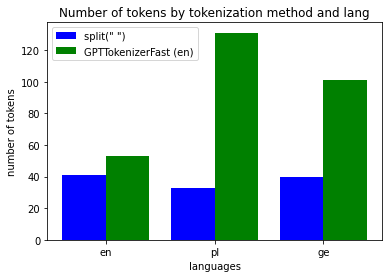

In [ ]:
# graph "Number of tokens by tokenization method and lang"
# source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
text_split = list()
toks_split = list()

for text in texts:
    text_split.append(len(text.split()))
    toks_ids = tokenizer_en.encode(text)
    toks_split.append(len(toks_ids))
    
labels = langs
xy = list(np.array([1.,2.,3.]) - 0.2)
xz = list(np.array([1.,2.,3.]) + 0.2)
y = text_split
z = toks_split

ax = plt.subplot(111)
ax.bar(xy, y, width=0.4, color='b', align='center')
ax.bar(xz, z, width=0.4, color='g', align='center')

ax.set_xlabel('languages')
ax.set_xticks(range(1,len(labels)+1))
ax.set_xticklabels(labels)
ax.set_ylabel('number of tokens')
ax.legend(['split(" ")', 'GPTTokenizerFast (en)'])

ax.set_title('Number of tokens by tokenization method and lang')

plt.show()

As we can see, **even if a GPT2TokenizerFast trained with an English corpus can tokenize any text in any language, it was optimized for English**( chart cleearly shows that): the number of generated tokens is lower for an English text than for the same text in another language with an equivalent number of words.



## English vs Polish tokenizer on Polish Wikipedia

In this paragraph, we will compare the number of tokens per Portuguese text generated respectively by the English and Portuguese tokenizers.

In [ ]:
lang = 'pl'
fname = f'all_texts_{lang}wiki.csv'
df = pd.read_csv(path_data/fname)
df.head()

,text
0,"Vanquish – gra konsolowa z gatunku third-person shooter, wyprodukowana przez PlatinumGames i wydana przez SEGA. Jej światowa premiera miała miejsce 19 października 2010 roku na konsolach PlayStation 3 i Xbox 360. 10 maja 2017 roku zapowiedziano wersję na komputery osobiste, której premiera odbędzie się 25 maja 2017 roku.\n\nAkcja gry rozgrywa się w okresie, w którym na Ziemi zaczyna brakować surowców i dwa największe mocarstwa (Stany Zjednoczone i Rosja) rozpoczynają o nie rywalizację. Pierwsi atakują Rosjanie dowodzeni przez Zajcewa. Przywódca agresorów stawia ultimatum: kapitulacja w cią..."
1,"Książka obrazkowa – specyficzna forma książki skierowana najczęściej do najmłodszych dzieci. W tego typu książkach tekstu jest niewiele lub nie ma go wcale. W publikacjach tych warstwa wizualna odgrywa nadrzędną rolę, a warstwa tekstowa jest w nich jedynie dodatkiem. Tekst powinien komponować się z grafiką, a nie odwrotnie, oderwany od ilustracji nie posiada bowiem większego znaczenia. Bez obrazu nie jest zrozumiały. Książkę obrazkową określa się mianem ewenementu natury edytorskiej. \n\nW polskiej bibliografii brakuje literatury przedmiotu poświęconej książce obrazkowej. W wielu źródłach ..."
2,"Gilles Simon (ur. 27 grudnia 1984 w Nicei) – francuski tenisista, reprezentant w Pucharze Davisa, olimpijczyk.\n\nKarierę tenisową Francuz rozpoczął w roku 2002. Pierwsze zwycięstwo w turniejach rangi ""ITF Futures"" odniósł w czerwcu 2003 roku w Lizbonie, a zawodach kategorii ATP Challenger Tour w styczniu 2005 roku w Numei.\n\nW turniejach rangi ATP World Tour pierwszy znaczący wynik Simon osiągnął w połowie kwietnia roku 2006, awansując do finału rozgrywek w Walencji. Finałowy pojedynek przegrał jednak w dwóch setach z Nicolásem Almagro.\n\nNa początku sezonu 2007 Simon wygrał po raz pier..."
3,"Wsiewołod Emilewicz Meyerhold, Mejerchold ros. Всеволод Эмильевич Мейерхольд (ur. w Penzie, zm. 2 lutego 1940 w Moskwie) – rosyjski reżyser, aktor teatralny, twórca nowatorskiego współczesnego teatru sowieckiego.\n\nPrzyszedł na świat jako ósme z kolei dziecko właściciela fabryki wódek i kupca, Emila Meyerholda, Niemca z Dolnego Śląska, osiadłego w Rosji. Na chrzcie (w kościele ewangelickim obrządku luterańskiego) otrzymał imiona Karl Theodor Casimir. Do 1895 roku miał obywatelstwo niemieckie. W 1895 roku ukończył II gimnazjum w Penzie. Rok wcześniej nie został dopuszczony do egzaminu dojr..."
4,"Alexandre-Édouard Kierzkowski właśc. Aleksander Edward Kierzkowski herbu Krzywda (ur. 21 listopada 1816 w Raczycach, zm. 4 sierpnia 1870) – kanadyjski żołnierz, inżynier i polityk polskiego pochodzenia.\n\nUrodził się w Raczycach koło Odolanowa (Wielkie Księstwo Poznańskie) jako syn Filipa Jakuba (napoleończyka, oficera wojsk polskich) i Marianny Ludwiki Liebermann. Został ochrzczony 20 października 1817 roku w Odolanowie. Wstąpił do Wojska Polskiego w czasie powstania listopadowego. Po klęsce wyemigrował do Francji, gdzie uzyskał w Paryżu w 1838 roku dyplom inżyniera na École Centrale des..."


In [ ]:
from tqdm import tqdm
import pandas as pd

### size of the file and RAM on colab are two constrains which are  cousing crashes. solution-> take  fraction of wiki text

In [ ]:
lang = 'pl'
name = f'{lang}wiki'
data_path = config['data_path']
path_data = data_path/name

In [ ]:
fname = f'all_texts_{lang}wiki.csv'
df = pd.read_csv(path_data/fname)
df.head()

,text
0,"Vanquish – gra konsolowa z gatunku third-person shooter, wyprodukowana przez PlatinumGames i wydana przez SEGA. Jej światowa premiera miała miejsce 19 października 2010 roku na konsolach PlayStation 3 i Xbox 360. 10 maja 2017 roku zapowiedziano wersję na komputery osobiste, której premiera odbędzie się 25 maja 2017 roku.\n\nAkcja gry rozgrywa się w okresie, w którym na Ziemi zaczyna brakować surowców i dwa największe mocarstwa (Stany Zjednoczone i Rosja) rozpoczynają o nie rywalizację. Pierwsi atakują Rosjanie dowodzeni przez Zajcewa. Przywódca agresorów stawia ultimatum: kapitulacja w cią..."
1,"Książka obrazkowa – specyficzna forma książki skierowana najczęściej do najmłodszych dzieci. W tego typu książkach tekstu jest niewiele lub nie ma go wcale. W publikacjach tych warstwa wizualna odgrywa nadrzędną rolę, a warstwa tekstowa jest w nich jedynie dodatkiem. Tekst powinien komponować się z grafiką, a nie odwrotnie, oderwany od ilustracji nie posiada bowiem większego znaczenia. Bez obrazu nie jest zrozumiały. Książkę obrazkową określa się mianem ewenementu natury edytorskiej. \n\nW polskiej bibliografii brakuje literatury przedmiotu poświęconej książce obrazkowej. W wielu źródłach ..."
2,"Gilles Simon (ur. 27 grudnia 1984 w Nicei) – francuski tenisista, reprezentant w Pucharze Davisa, olimpijczyk.\n\nKarierę tenisową Francuz rozpoczął w roku 2002. Pierwsze zwycięstwo w turniejach rangi ""ITF Futures"" odniósł w czerwcu 2003 roku w Lizbonie, a zawodach kategorii ATP Challenger Tour w styczniu 2005 roku w Numei.\n\nW turniejach rangi ATP World Tour pierwszy znaczący wynik Simon osiągnął w połowie kwietnia roku 2006, awansując do finału rozgrywek w Walencji. Finałowy pojedynek przegrał jednak w dwóch setach z Nicolásem Almagro.\n\nNa początku sezonu 2007 Simon wygrał po raz pier..."
3,"Wsiewołod Emilewicz Meyerhold, Mejerchold ros. Всеволод Эмильевич Мейерхольд (ur. w Penzie, zm. 2 lutego 1940 w Moskwie) – rosyjski reżyser, aktor teatralny, twórca nowatorskiego współczesnego teatru sowieckiego.\n\nPrzyszedł na świat jako ósme z kolei dziecko właściciela fabryki wódek i kupca, Emila Meyerholda, Niemca z Dolnego Śląska, osiadłego w Rosji. Na chrzcie (w kościele ewangelickim obrządku luterańskiego) otrzymał imiona Karl Theodor Casimir. Do 1895 roku miał obywatelstwo niemieckie. W 1895 roku ukończył II gimnazjum w Penzie. Rok wcześniej nie został dopuszczony do egzaminu dojr..."
4,"Alexandre-Édouard Kierzkowski właśc. Aleksander Edward Kierzkowski herbu Krzywda (ur. 21 listopada 1816 w Raczycach, zm. 4 sierpnia 1870) – kanadyjski żołnierz, inżynier i polityk polskiego pochodzenia.\n\nUrodził się w Raczycach koło Odolanowa (Wielkie Księstwo Poznańskie) jako syn Filipa Jakuba (napoleończyka, oficera wojsk polskich) i Marianny Ludwiki Liebermann. Został ochrzczony 20 października 1817 roku w Odolanowie. Wstąpił do Wojska Polskiego w czasie powstania listopadowego. Po klęsce wyemigrował do Francji, gdzie uzyskał w Paryżu w 1838 roku dyplom inżyniera na École Centrale des..."


In [ ]:
%%time
df2= df.sample(frac=0.3) #wezmy 30% moze sie nie wywali
# df2 = df.copy() #generally this good  but without crash

tokens_en_list = list()
num_token_by_word_en_list = list()
tokens_pl_list = list()
num_token_by_word_pl_list = list()

for index, row in tqdm(df2.iterrows()):
    text = row['text']
    
    tokens_en = tokenizer_en.encode(text)
    tokens_pl = tokenizer_pl.encode(text)
    
    tokens_en_list.append(tokens_en)
    tokens_pl_list.append(tokens_pl)
    
    length_text = len(text.split())
    tokens_by_word_en = len(tokens_en)/length_text
    tokens_by_word_pl = len(tokens_pl)/length_text
    
    num_token_by_word_en_list.append(tokens_by_word_en)
    num_token_by_word_pl_list.append(tokens_by_word_pl)
    
df2['tokens_en'] = tokens_en_list
df2['num_token_by_word_en'] = num_token_by_word_en_list
df2['tokens_pl'] = tokens_pl_list
df2['num_token_by_word_pl'] = num_token_by_word_pl_list

68883it [06:54, 166.01it/s]


CPU times: user 6min 59s, sys: 6.52 s, total: 7min 5s
Wall time: 7min 4s


In [ ]:
ls /root/.fastai/data/plwiki/ByteLevelBPE_tokenizer_pl/ -all

total 1412
drwxr-xr-x 2 root root   4096 Mar 16 18:26 ./
drwxr-xr-x 3 root root   4096 Mar 16 18:26 ../
-rw-r--r-- 1 root root 545015 Mar 16 18:26 merges.txt
-rw-r--r-- 1 root root 886662 Mar 16 18:26 vocab.json


In [ ]:
df2.head()

,text,tokens_en,num_token_by_word_en,tokens_pl,num_token_by_word_pl
183907,"Katarzyna Ida Żukrowska (ur. 12 kwietnia 1949 we Wrocławiu) – polska ekonomistka i politolog, specjalista od międzynarodowych stosunków gospodarczych i politycznych, profesor nauk ekonomicznych.\n\nUzyskała tytuł zawodowy magistra ekonomii w 1973 r. w Szkole Głównej Planowania i Statystyki, stopień naukowy doktora w 1984 tamże, przyznała go Rada Wydziału Handlu Zagranicznego. Dysertację habilitacyjną na temat ""Broń na sprzedaż. Kompleks militarno-przemysłowy a zbrojenia"" obroniła w 1989, stopień doktora habilitowanego nauk humanistycznych w zakresie nauk o polityce, specjalność: nauki o po...","[42, 9459, 89, 46434, 5121, 64, 25370, 119, 2724, 8516, 4914, 357, 333, 13, 1105, 479, 86, 1155, 18142, 24977, 356, 370, 12204, 41615, 707, 16115, 8, 784, 755, 82, 4914, 304, 74, 6326, 396, 4914, 1312, 1408, 928, 11, 1020, 73, 282, 12523, 16298, 21504, 128, 247, 67, 89, 2047, 283, 375, 322, 88, 354, 336, 418, 2954, 10205, 86, 308, 2117, 375, 5605, 7357, 354, 1312, 755, 414, 26691, 3281, 354, 11, 1534, 274, 273, 299, 559, 74, 304, 74, 6326, 28051, 3281, 354, 13, 198, 198, 52, 89, 893, 4914, 41615, 64, 1259, 28047, 41615, 1976, 707, ...]",3.803571,"[43, 6204, 264, 42734, 26703, 2757, 510, 343, 487, 14, 1104, 1314, 4643, 767, 5029, 9, 441, 5709, 4595, 4038, 286, 31631, 2743, 12, 19722, 365, 7135, 11307, 13211, 286, 5839, 12, 5379, 1299, 15910, 14, 199, 199, 53, 395, 22257, 1637, 20114, 10188, 16308, 260, 4542, 465, 14, 260, 5247, 10327, 28680, 286, 23760, 7837, 12, 4073, 9206, 4102, 260, 4472, 10629, 12, 19665, 599, 6725, 3940, 20417, 38728, 14, 1701, 1775, 7008, 25461, 3516, 289, 3398, 389, 21878, 337, 289, 10448, 14, 43454, 9612, 344, 13, 44227, 369, 334, 3173, 16056, 2, 30427, 260, 3409, 12, 4073, 4102, ...]",1.541667
185112,"Alberto Ascari (ur. 13 lipca 1918 w Mediolanie, zm. 26 maja 1955 na Autodromo Nazionale di Monza) – włoski kierowca wyścigowy, dwukrotny mistrz Formuły 1.\n\nUrodził się w Mediolanie we Włoszech, a wyścigiami zainteresował się dzięki ojcu Antonio Ascari, kierowcy wyścigów Grand Prix w latach 20. XX wieku jako kierowca Alfa Romeo. Antonio zmarł podczas Grand Prix Francji w 1925 roku.\n\nJako młody chłopak brał udział w wyścigach motocyklowych; było to po tym jak wstąpił do prestiżowego Mille Miglia sportów samochodowych Ferrari gdzie w końcu przeszedł do wyścigów samochodów.\n\nJego karierę...","[2348, 32371, 29469, 2743, 357, 333, 13, 1511, 10645, 6888, 25859, 266, 2019, 1669, 34166, 11, 1976, 76, 13, 2608, 16486, 64, 25325, 12385, 5231, 375, 398, 78, 12819, 295, 1000, 2566, 2892, 4496, 8, 784, 266, 41615, 418, 4106, 479, 959, 322, 6888, 266, 88, 129, 249, 22683, 322, 88, 11, 43756, 2724, 10599, 3281, 4020, 81, 89, 5178, 84, 41615, 88, 352, 13, 198, 198, 52, 14892, 17027, 41615, 33721, 128, 247, 266, 2019, 1669, 34166, 356, 370, 41615, 418, 15356, 11, 257, 266, 88, 129, 249, 22683, 7871, 1976, 391, 660, 411, 8455, 41615, 33721, 128, 247, ...]",3.097610,"[5219, 33077, 5860, 2771, 73, 343, 487, 14, 1189, 1276, 3049, 260, 21660, 12, 994, 14, 2197, 1228, 5465, 289, 11265, 3211, 525, 513, 14517, 298, 3750, 3602, 444, 9, 441, 10376, 15572, 31914, 12, 24845, 3996, 12503, 301, 14, 199, 199, 4678, 332, 260, 21660, 767, 7158, 12, 334, 3330, 3870, 308, 20109, 332, 2022, 17320, 13230, 5860, 2771, 73, 12, 13930, 16456, 5365, 6167, 260, 658, 412, 14, 1617, 868, 566, 15572, 31509, 41341, 14, 13230, 3167, 954, 5365, 6167, 2334, 260, 4866, 388, 14, 199, 199, 7206, 4499, 30790, 4230, 1065, 260, 16115, 30408, 518, 27, 939, ...]",1.370518
203374,"16 000 000 beli po sadze Eines Lobby\n\nNami na lewym ramieniu ma tatuaż przedstawiający pomarańczę oraz wiatraczek (są to symbole związane z jej przeszłością), dawniej w tym samym miejscu miała tatuaż pirackiej załogi Arlonga.\n\nPoczątkowo Nami nosiła krótkie skórzane botki i zwykły t-shirt, jednakże po sadze Arlong Park, zmienia nieco sposób ubierania – zaczyna nosi sandały i nieco bardziej odsłonięte i różnorodn

In [ ]:
# save
fname = "comparaison_tokenizers_en_pl_with_corpus_pl.csv"
df2.to_csv(path_data/fname, index=False)

In [ ]:
# load
fname = "comparaison_tokenizers_en_pl_with_corpus_pl.csv"
df2 = pd.read_csv(path_data/fname)

In [ ]:
# check min
num_token_by_word_en_min = df2.num_token_by_word_en.min()
num_token_by_word_pl_min = df2.num_token_by_word_pl.min()
print('(en)',round(num_token_by_word_en_min,2))
print('(pl)',round(num_token_by_word_pl_min,2))

(en) 1.6
(pl) 1.17


In [ ]:
# check max
num_token_by_word_en_max = df2.num_token_by_word_en.max()
num_token_by_word_pl_max = df2.num_token_by_word_pl.max()
print('(en)',round(num_token_by_word_en_max,2))
print('(pl)',round(num_token_by_word_pl_max,2))

(en) 5.59
(pl) 4.09


In [ ]:
# check mean
num_token_by_word_en_mean = df2.num_token_by_word_en.mean()
num_token_by_word_pl_mean = df2.num_token_by_word_pl.mean()
print('(en)',round(num_token_by_word_en_mean,2))
print('(pl)',round(num_token_by_word_pl_mean,2))

(en) 3.59
(pl) 1.55


In [ ]:
# check increase rate and Multiplier coefficient
increase = 0.
multiplier = 0.

for tok_en,tok_pl in zip(*(tokens_en_list,tokens_pl_list)):
    increase += (len(tok_en)-len(tok_pl))/len(tok_pl)
    multiplier += len(tok_en)/len(tok_pl)
    
# Rate of increase in % from pt to en
increase_pct = increase / len(tokens_en_list)
print('Rate of increase:',round(increase_pct*100,2),'%')

# Multiplier coefficient = (Rate of increase in %, converted to number) + 1
multiplier_coef = round(increase_pct+1,2)
print('Multiplier coefficient:',multiplier_coef)

# Multiplier coefficient in % = Multiplier coefficient, converted to %
multiplier_pct = round((multiplier/len(tokens_en_list))*100,2)
print('Multiplier coefficient in %:',multiplier_pct,'%')

Rate of increase: 133.69 %
Multiplier coefficient: 2.34
Multiplier coefficient in %: 233.69 %


### Graph

In [ ]:
%%time
len_tokens_text_list = list()
for index, row in df2.iterrows():
    text = row['text']
    length_text = len(text.split())
    len_tokens_text_list.append(length_text)

tokens_en_list = df2.tokens_en.tolist()
len_tokens_en_list = [len(t) for t in tokens_en_list]

tokens_pl_list = df2.tokens_pl.tolist()
len_tokens_pl_list = [len(t) for t in tokens_pl_list]

CPU times: user 8.58 s, sys: 269 ms, total: 8.85 s
Wall time: 8.86 s


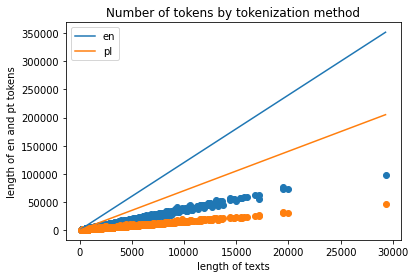

In [ ]:
sorted_len_tokens_text_list = sorted(len_tokens_text_list)
y_len_tokens_en_list = (12*np.array(sorted_len_tokens_text_list)).tolist() 
y_len_tokens_pl_list = (7*np.array(sorted_len_tokens_text_list)).tolist()                             

ax = plt.subplot(111)
ax.scatter(len_tokens_text_list, len_tokens_en_list)
ax.plot(sorted_len_tokens_text_list, y_len_tokens_en_list)
ax.scatter(len_tokens_text_list, len_tokens_pl_list)
ax.plot(sorted_len_tokens_text_list, y_len_tokens_pl_list)

ax.set_xlabel('length of texts')
ax.set_ylabel('length of en and pt tokens')
ax.legend(['en', 'pl'])

ax.set_title('Number of tokens by tokenization method')

plt.show()

As we can see, the use of a BBPE tokenizer trained with an English corpus on a corpus of another language (here, Polish) **requires on average almost 233.69 % of additional tokens**  than a BBPE tokenizer trained with the same language of the corpus of application.